### CLUSTERING COUNTRIES BASED ON SOCIO_ECONOMIC FACTORS for Financial Aid by NGO (K-MEANS & HIERARCHIAL CLUSTERING)

## Approach
Based on the business problem and looking at the dataset at a high level, I will be following the below approach to solve this problem.  

- Data Understanding and Data Cleaing
- EDA 
- Data Preparation
    - Data Scaling
    - Outlier Treatement
    - Hopkins Statistics (to check if the dataset is good enough for a cluster analysis)
- Clustering
    - K-Means Clustering
        - Silhouette Score
        - Elbow Curve/SSD
    - Hierarchical clustering
        - Single Linkage
        - Complete Linkage
- Cluster Profiling
- Final Analysis and Outcome

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

In [3]:
# Data display coustomization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

## Data Understanding

### Read Data and Data Dictionary

In [4]:
# Read the dataset
df_ngo = pd.read_csv('Country-data.csv')
df_ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
dict_df = pd.read_csv('data-dictionary+.csv')
dict_df

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [6]:
# Shape of dataframe
df_ngo.shape

(167, 10)

In [7]:
# Basic Info of dataframe
df_ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
# Statisric Desc
df_ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


**Insight** 
- Dataframe has data about various countries and their socio-economic factors. Few are in % and others in absolute values. 
- Dataframe has 10 Columns and 167 Rows 
- One variable is 'Object' Type, and rest all are 'Int' or 'Float' type 
- Descriptive Statistics tells us that there is variablity in the data, and will require scaling before model building.

### Data Cleaning

In [9]:
# Missing values in columns
round(100*(df_ngo.isnull().sum())/len(df_ngo), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [10]:
# Missing values in row
(100 * df_ngo.isnull().sum(axis=1)/len(df_ngo)).value_counts(ascending=False)

0.0    167
dtype: int64

**Insight** - NO MISSING values in the dataset

In [11]:
# Checking for duplicates and dropping the entire duplicate row if any
df_ngo.drop_duplicates(subset=None, inplace=True)

In [12]:
# Checking shape again
df_ngo.shape

(167, 10)

**Insight** - NO DUPLICATE values in the dataset, as the shape before and after drop duplicate is same

## Exploratory Data Analysis

#### Derived Metrics
Deducing imports,exports and health spending from percentage values to actual values of their GDP per capita. Because the percentage values mislead EDA of that country. For example few coutries Austria and Belarus have almost same exports % but their gdpp has a huge gap which doesn't give an accurate idea of which country is more developed than the other.

In [13]:
# Converting imports, exports and health spending percentages to absolute values.

df_ngo['imports'] = df_ngo['imports'] * df_ngo['gdpp']/100
df_ngo['exports'] = df_ngo['exports'] * df_ngo['gdpp']/100
df_ngo['health'] = df_ngo['health'] * df_ngo['gdpp']/100

df_ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Univariate/Bivariate Analysis

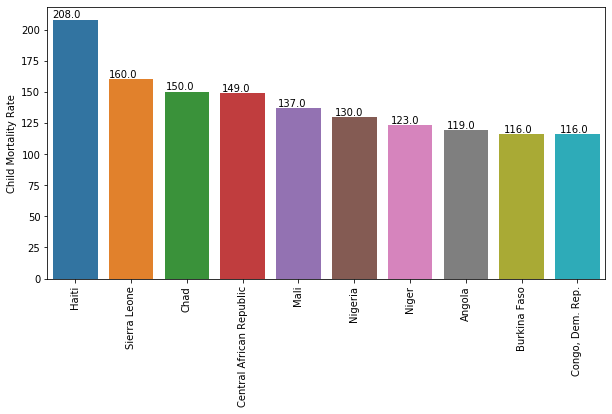

In [14]:
# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
# Top 10 Countries with highest child mortality rate
plt.figure(figsize = (10,5))
child_mort_top10 = df_ngo[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
ax = sns.barplot(x='country', y='child_mort', data=child_mort_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

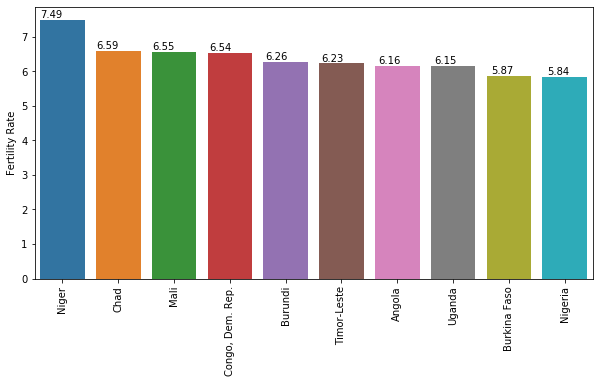

In [15]:
# Fertility Rate : The number of children that would be born to each woman if the current age-fertility rates remain the same
# Top 10 Countries with highest fertility rate
plt.figure(figsize = (10,5))
total_fer_top10 = df_ngo[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
ax = sns.barplot(x='country', y='total_fer', data=total_fer_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()

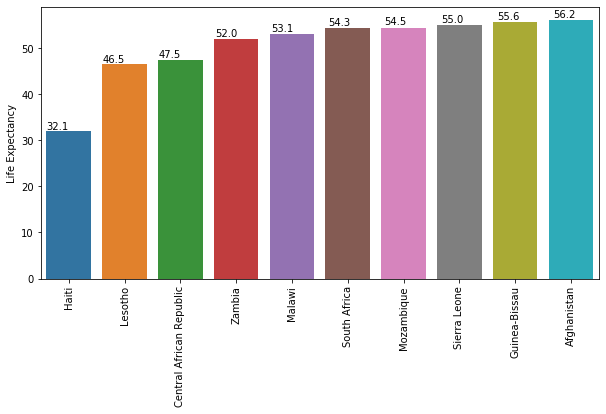

In [16]:
# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
# Bottom 10 Countries with lowest life expectancy
plt.figure(figsize = (10,5))
life_expec_bottom10  = df_ngo[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
ax = sns.barplot(x='country', y='life_expec', data=life_expec_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

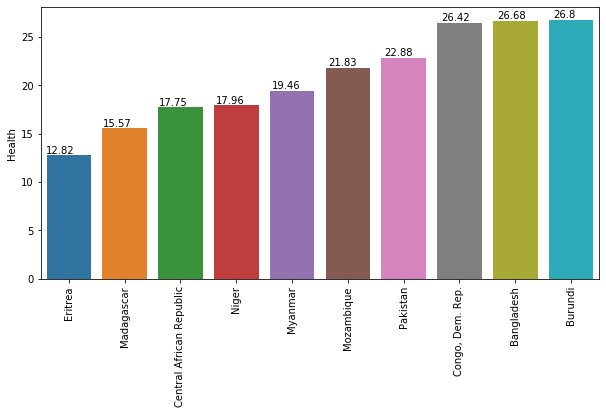

In [17]:
# Health :Total health spending as %age of Total GDP
# Bottom 10 Countries with lowest health
plt.figure(figsize = (10,5))
health_bottom10  = df_ngo[['country','health']].sort_values('health', ascending = True).head(10)
ax = sns.barplot(x='country', y='health', data=health_bottom10)
for p in ax.patches:
     ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

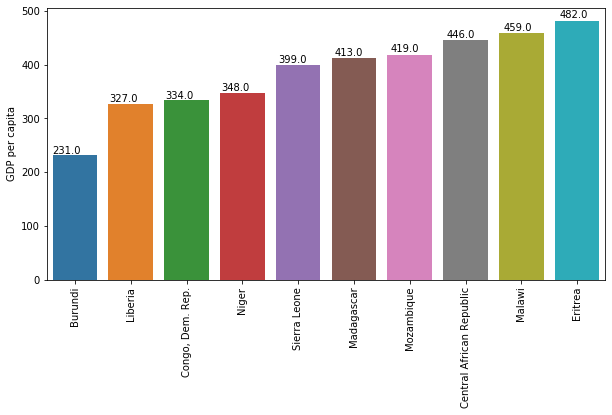

In [18]:
# The GDP per capita : Calculated as the Total GDP divided by the total population
# Bottom 10 Countries with lowest gdp
plt.figure(figsize = (10,5))
health_bottom10  = df_ngo[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
ax = sns.barplot(x='country', y='gdpp', data=health_bottom10)
for p in ax.patches:
     ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')
plt.xticks(rotation=90)
plt.show()

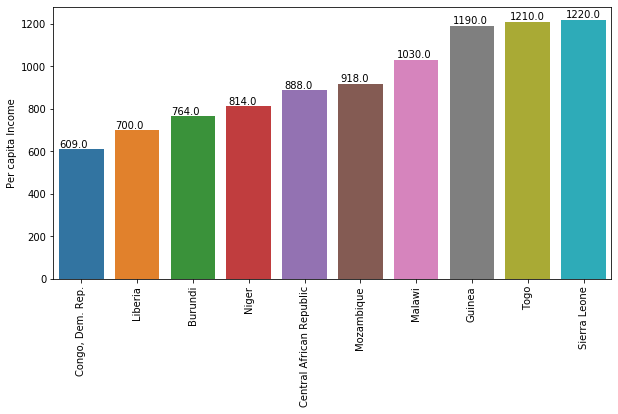

In [19]:
# Per capita Income : Net income per person
# Bottom 10 Countries with lowest per capita income
plt.figure(figsize = (10,5))
income_bottom10  = df_ngo[['country','income']].sort_values('income', ascending = True).head(10)
ax = sns.barplot(x='country', y='income', data=income_bottom10)
for p in ax.patches:
     ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

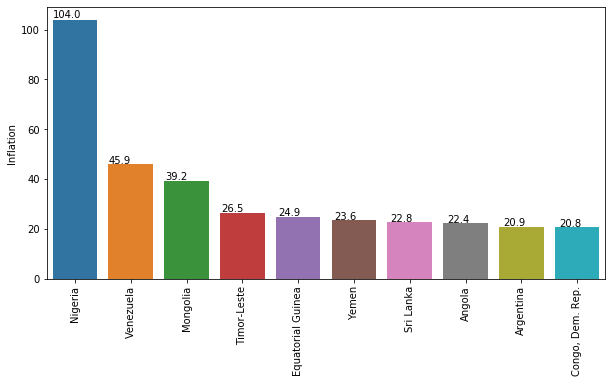

In [20]:
# Inflation: The measurement of the annual growth rate of the Total GDP
# Top 10 countries with highest Inflation
plt.figure(figsize = (10,5))
inflation_top10  = df_ngo[['country','inflation']].sort_values('inflation', ascending = False).head(10)
ax = sns.barplot(x='country', y='inflation', data=inflation_top10)
for p in ax.patches:
     ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show()

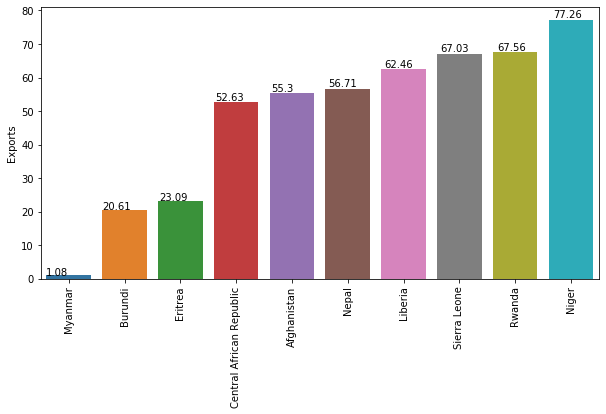

In [21]:
# Exports: Exports of goods and services. Given as %age of the Total GDP
# Bottom 10 countries with lowest exports
plt.figure(figsize = (10,5))
exports_bottom10  = df_ngo[['country','exports']].sort_values('exports', ascending = True).head(10)
ax = sns.barplot(x='country', y='exports', data=exports_bottom10)
for p in ax.patches:
     ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

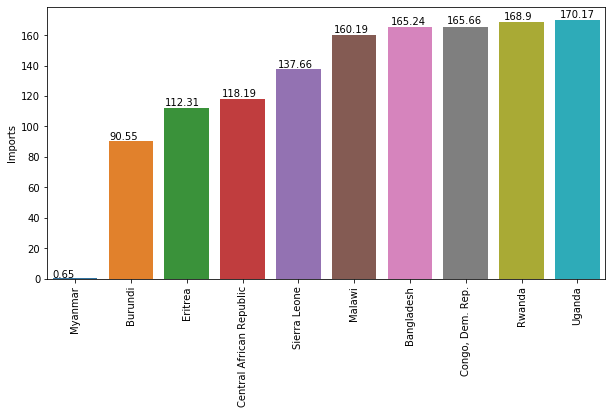

In [22]:
# Imports: Imports of goods and services. Given as %age of the Total GDP
# Bottom 10 countries with lowest imports
plt.figure(figsize = (10,5))
imports_bottom10  = df_ngo[['country','imports']].sort_values('imports', ascending = True).head(10)
ax = sns.barplot(x='country', y='imports', data=imports_bottom10)
for p in ax.patches:
     ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')
plt.xticks(rotation=90)
plt.show()

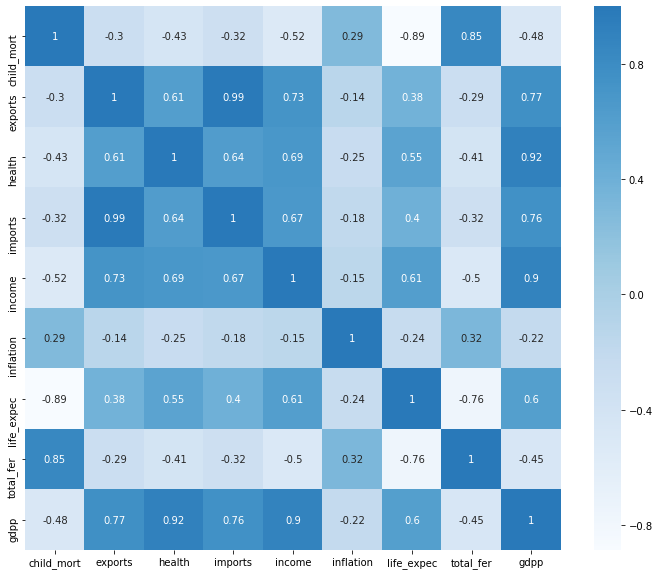

In [23]:
# Correlation matrix 

plt.figure(figsize = (12,10))
sns.heatmap(df_ngo.corr(), annot = True, cmap="Blues", center=0.423)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

- child_mortality and life_expentency are highly correlated with correlation of -0.89
- child_mortality and total_fertility are highly correlated with correlation of 0.85
- imports and exports are highly correlated with correlation of 0.99
- life_expentency and total_fertility are highly correlated with correlation of -0.76

In [24]:
# Copying the dataframe for later use
ngo_dup = df_ngo.copy()
ngo_dup.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Data Preparation

### Outlier Analysis

In [25]:
# ignoring Country column from analysis
f = df_ngo.columns[1:]
list(enumerate(f))

[(0, 'child_mort'),
 (1, 'exports'),
 (2, 'health'),
 (3, 'imports'),
 (4, 'income'),
 (5, 'inflation'),
 (6, 'life_expec'),
 (7, 'total_fer'),
 (8, 'gdpp')]

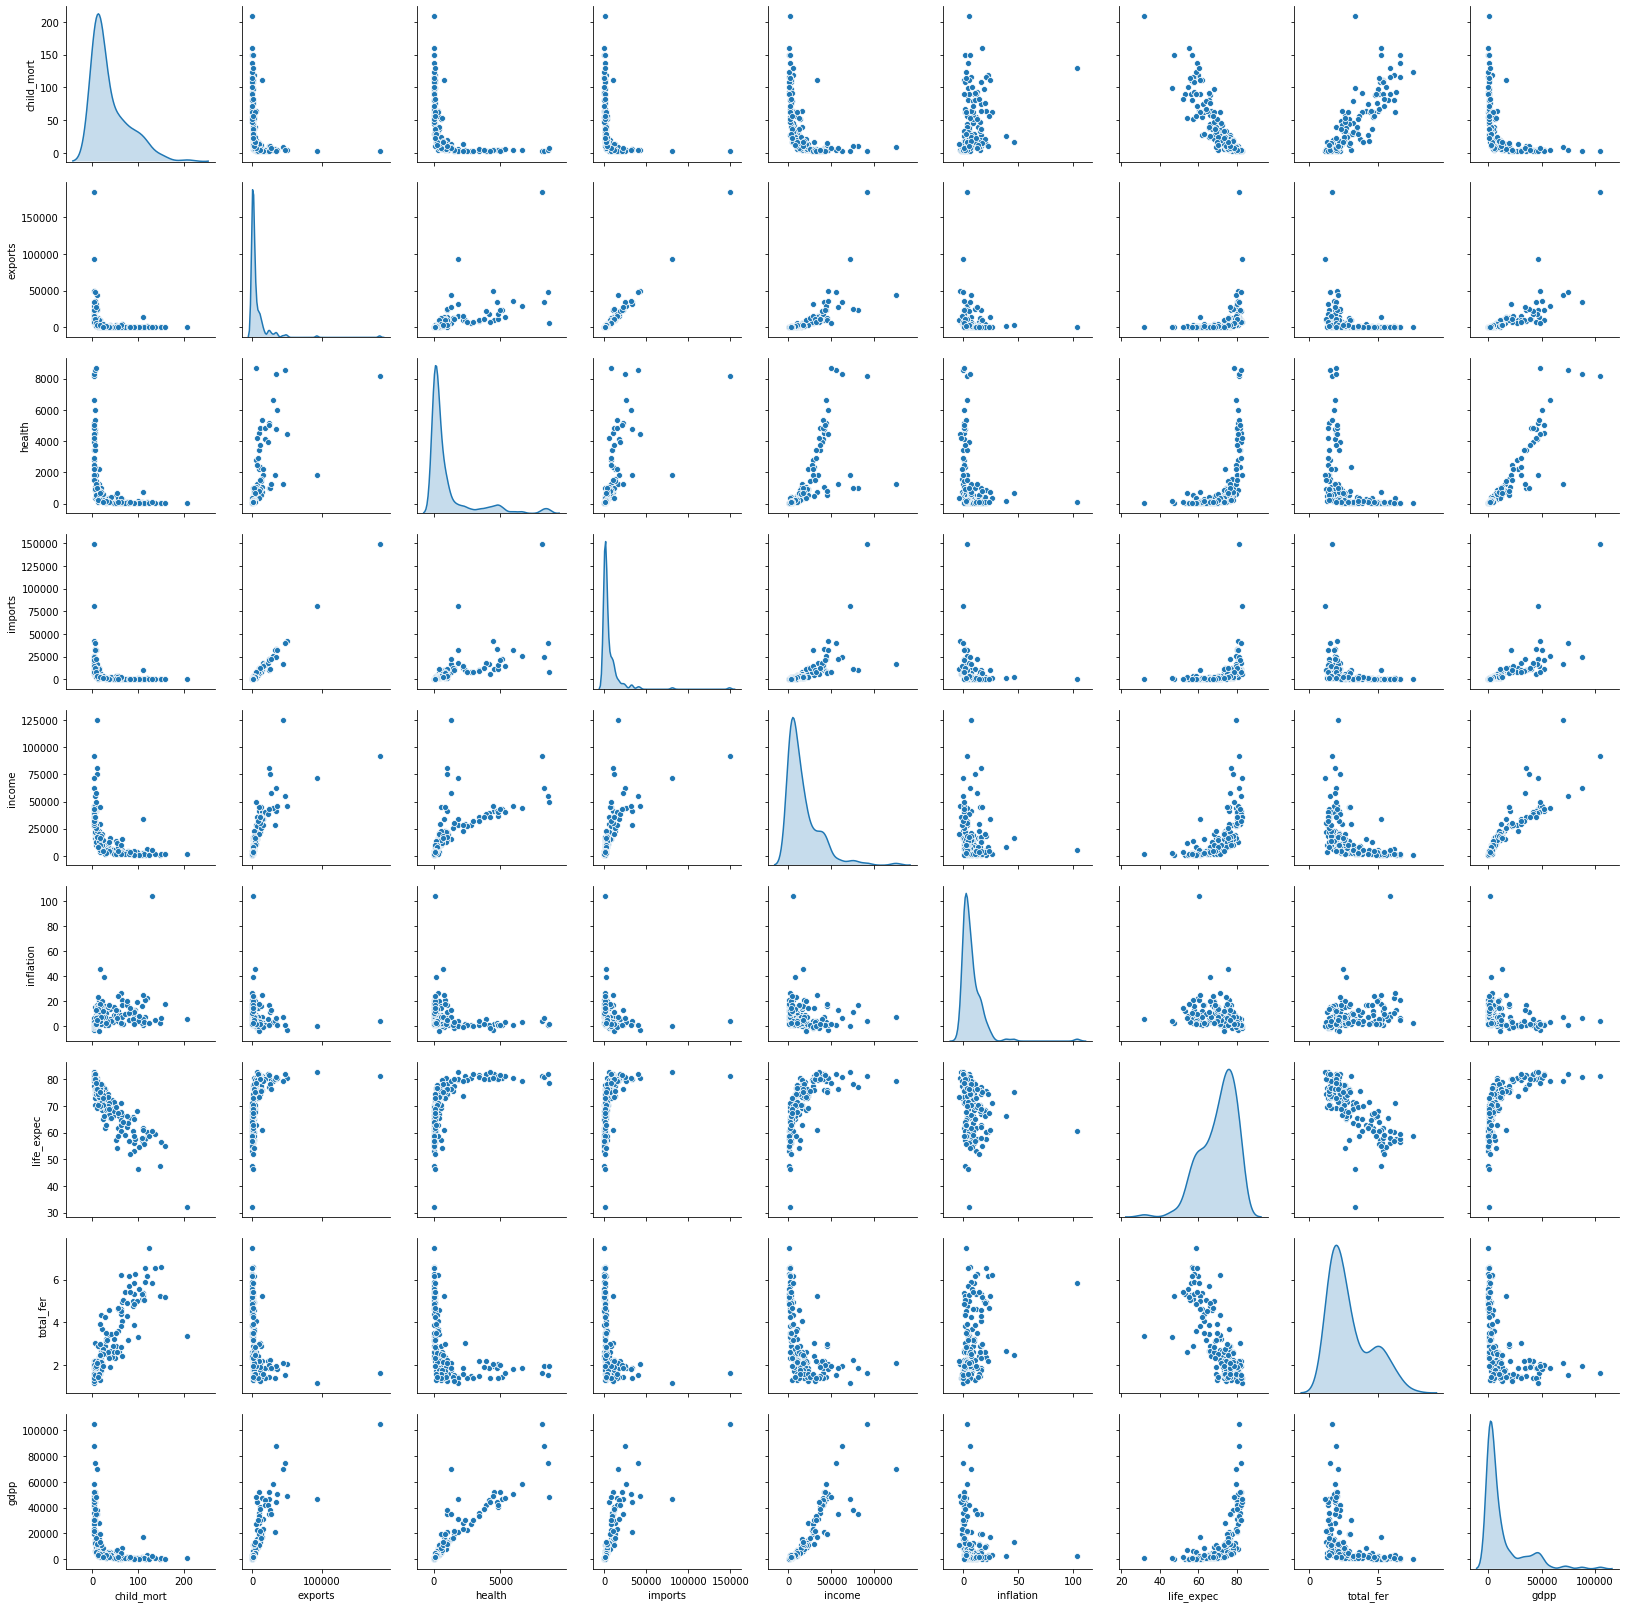

In [26]:
# Visualising Distribution by pair plot
sns.pairplot(df_ngo,diag_kind='kde')
plt.show()

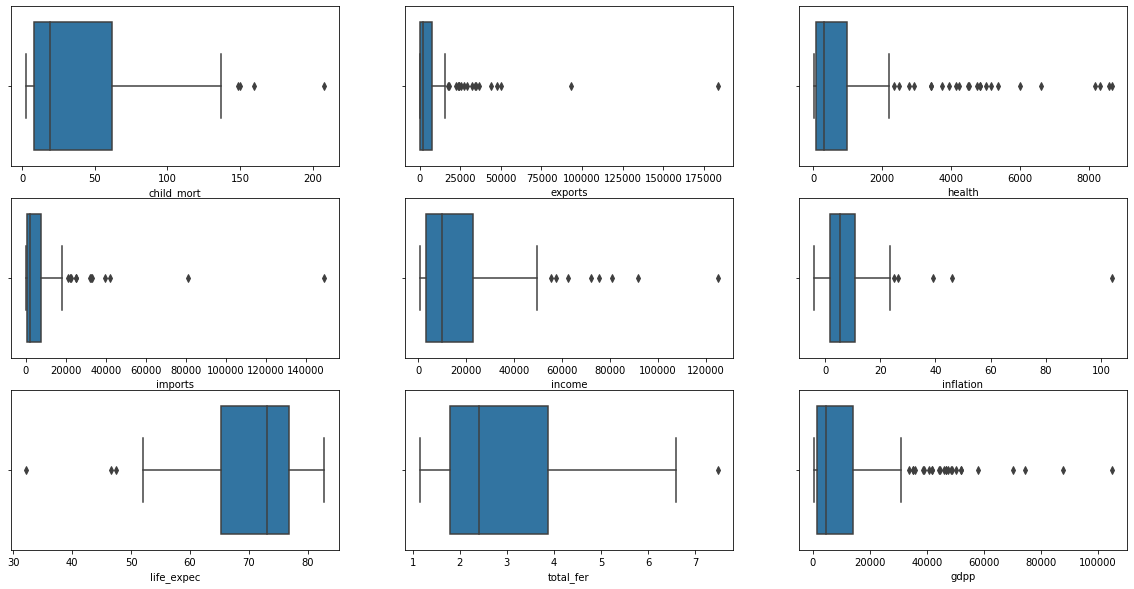

In [27]:
# plot boxplot using subplot
plt.figure(figsize=[20,10])
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=i[1], data=df_ngo)

There are outliers in almost all the features esp in gdpp and health  
As we have limited number of countries(167), removing these outliers would shrink the shape of data and the under-developed countries which are in actual dire need may not contribute to the dataset.

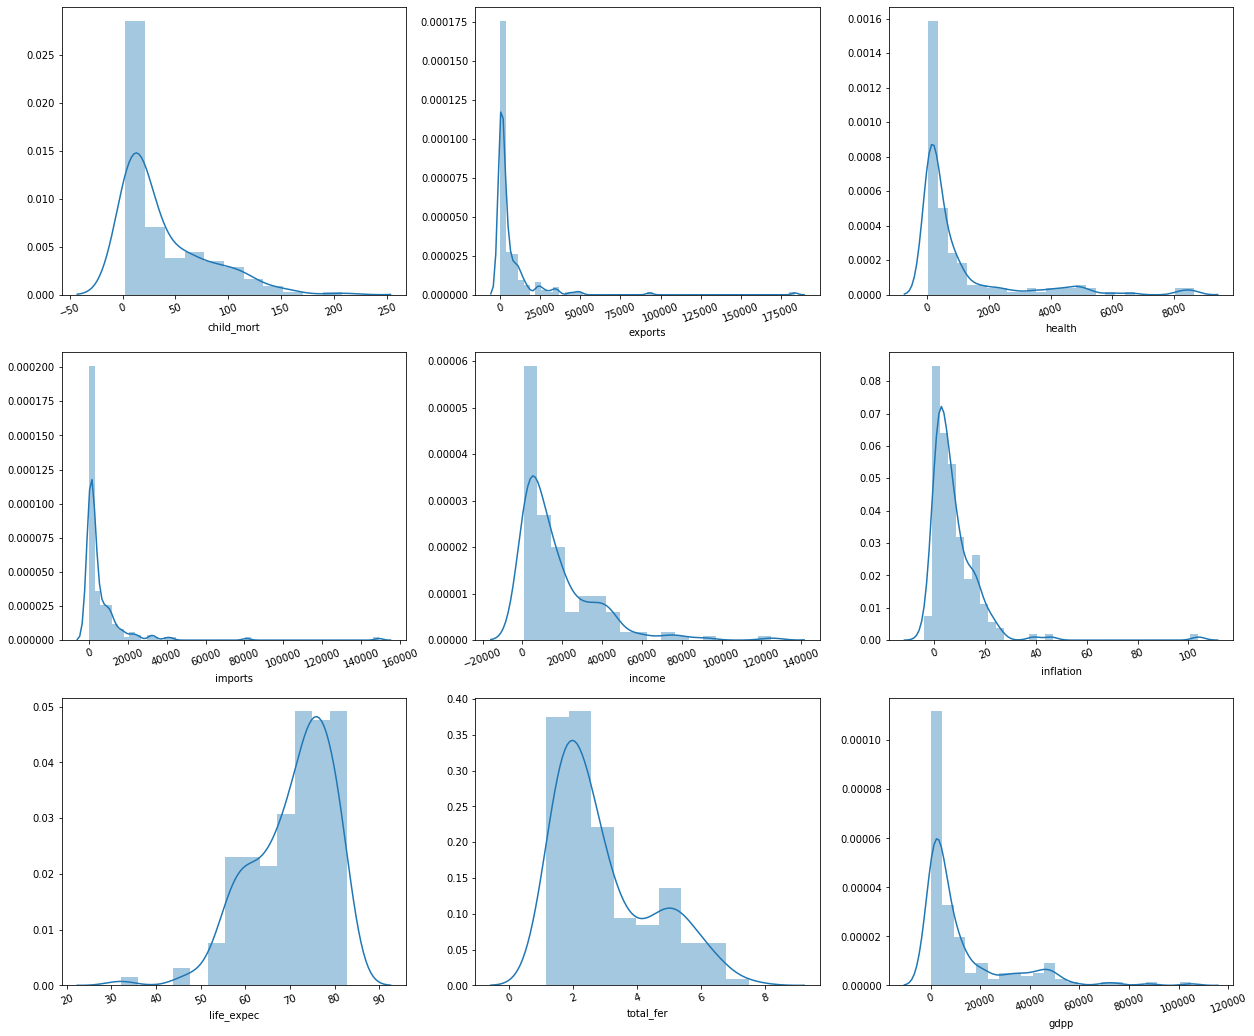

In [28]:
# Plot histogram for each continous variables
plt.figure(figsize=(21, 18))
for i in enumerate(f):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(df_ngo[i[1]])
    plt.xticks(rotation=20)

**Insights** - We use Percentile Capping (Winsorization) for outliers handling  

- Winsorizing or winsorization is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers.  
- In layman's terms, Winsorizing (Capping) at 1st and 99th percentile implies values that are less than the value at 1st percentile are replaced by the value at 1st percentile and values that are greater than the value at 99th percentile are replaced by the value at 99th percentile.
- As we need to compute the Euclidean distance between the data points, it is important to ensure that the attributes with a larger range of values do not out-weight the attributes with smaller range. Thus, scaling down of all attributes to the same normal scale is important here.

In [29]:
# outlier treatment
for i in f:
    q1 = df_ngo[i].quantile(0.01)
    q4 = df_ngo[i].quantile(0.99)
    
    df_ngo[i][df_ngo[i]<=q1] = q1
    df_ngo[i][df_ngo[i]>=q4] = q4

df_ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [30]:
df_ngo.shape

(167, 10)

In [31]:
df_ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.904790,6538.351334,1054.240319,5873.845499,16858.601677,7.397332,70.645269,2.942896,12757.456527
std,39.026793,11415.230052,1790.825675,9422.259867,17956.060832,7.770993,8.553975,1.497595,17429.755235
min,2.800000,22.243716,17.009362,104.909640,742.240000,-2.348800,47.160000,1.243200,331.620000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


### Data Scaling

In [32]:
# instantiate scaler
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(df_ngo.drop('country', axis=1))
df_scaled.shape

(167, 9)

In [33]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df_ngo.columns[1:]
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


### Hopkins Statistics

In [34]:
# check the hopkins statistics
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
hopkins(df_scaled)

0.8588448655875868

**Insight** - Hopkins Statistic over .70 is a good score that indicated that the data is good for cluster analysis. 
- A 'Hopkins Statistic' value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

## Clustering - Model Building

### K-Means Clustering

#### Finding optimal Number of clusters - Elbow Curve

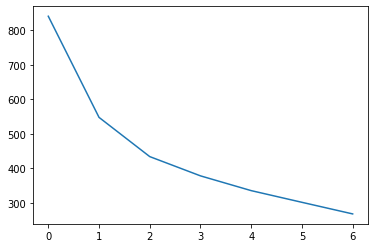

In [36]:
# elbow-curve/SSD - Elbow curve method to find the ideal number of clusters
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)
plt.show()

#### Silhouette Score and Plot

In [37]:
# silhouette analysis to find the ideal number of clusters
sil=[]
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter=50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    sil.append([num_clusters,silhouette_avg])
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.46939980287788113
For n_clusters=3, the silhouette score is 0.40708993455880504
For n_clusters=4, the silhouette score is 0.39539142309551445
For n_clusters=5, the silhouette score is 0.3700893262840812
For n_clusters=6, the silhouette score is 0.30126987256784077
For n_clusters=7, the silhouette score is 0.31457512984403474
For n_clusters=8, the silhouette score is 0.3272006902177921


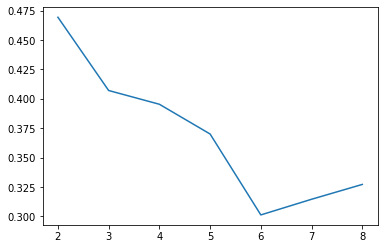

In [38]:
sil = pd.DataFrame(sil)
plt.plot(sil[0],sil[1])
plt.show()

**Insight** - Looking at both Elbow Curve plot and silhouette analysis we will proceed with 3 and 4 to decide an optimal number of cluster for our K-Means clustering  

In [39]:
# model with k=3
kmeans = KMeans(n_clusters=3, random_state=0, max_iter=50)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [40]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [41]:
# model with k=4
kmeans4 = KMeans(n_clusters=4, random_state=0, max_iter=50)
kmeans4.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [42]:
kmeans4.labels_

array([1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 3,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0,
       1, 0, 3, 0, 0, 0, 1, 2, 3, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 3, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 3, 3, 1, 1, 3, 3, 0, 0, 1, 0, 3, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1])

In [43]:
# assign the label to original df
df_ngo['k_cluster_id'] = kmeans.labels_
df_ngo['k4_cluster_id'] = kmeans4.labels_
df_ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_cluster_id,k4_cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,0


In [44]:
## Number of countries in each cluster for k = 3
df_ngo.k_cluster_id.value_counts(ascending=True)

1    29
0    48
2    90
Name: k_cluster_id, dtype: int64

In [45]:
## Number of countries in each cluster for k =4
df_ngo.k4_cluster_id.value_counts(ascending=True)

2    9 
3    28
1    48
0    82
Name: k4_cluster_id, dtype: int64

**Insight**: - It seems there are good number of countries in each clusters for k=3. As we know countries are classified into 3 categories based on their level of development, so k=3 will also help us to cluster the data into three types - Developed, Developing and Under Derveloped Countries

Hence, we will consider our final model with k=3 for our further analysis  

From the business understanding we have learnt that Child_Mortality, Income, Gdpp are some important factors which decides the development of any country. Hence, we will proceed with analyzing these 3 components to build some meaningful clusters.

In [46]:
# dropping k4 cluster labels from original df
df_ngo.drop('k4_cluster_id', axis=1, inplace=True)
df_ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


#### Visualize the spread of the data across clusters

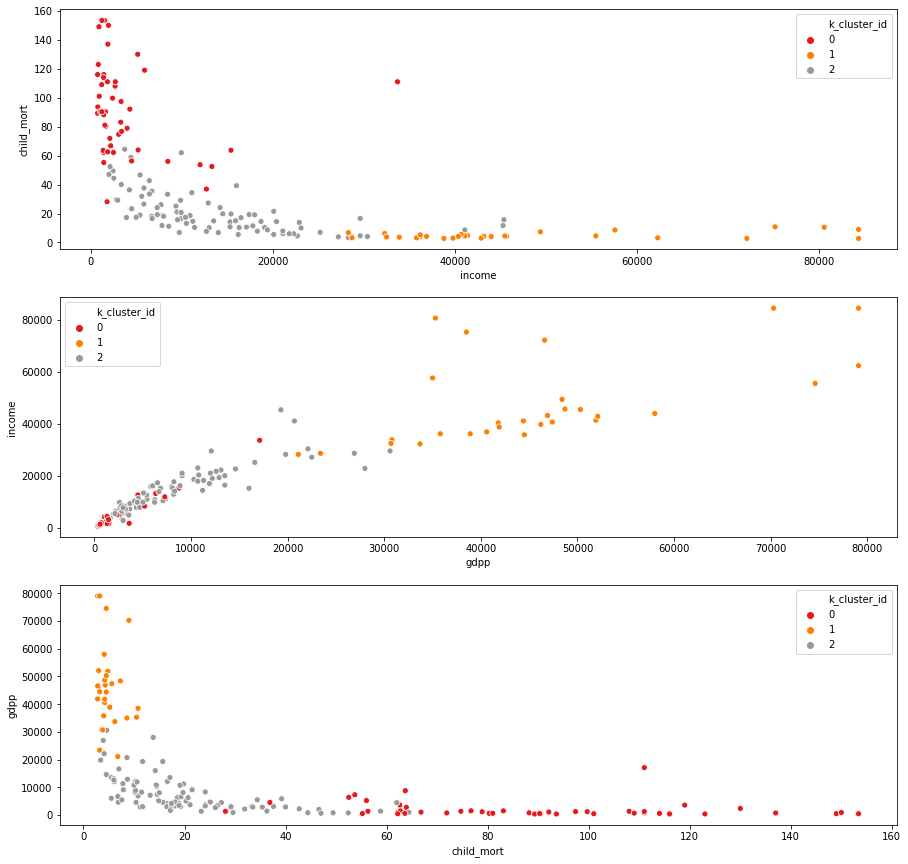

In [47]:
# Scatter plot on Original attributes to visualize
plt.figure(figsize = (15,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort', hue='k_cluster_id',data = df_ngo, legend='full', palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income', hue='k_cluster_id', data = df_ngo, legend='full', palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue='k_cluster_id', data= df_ngo, legend='full', palette="Set1")
plt.show()

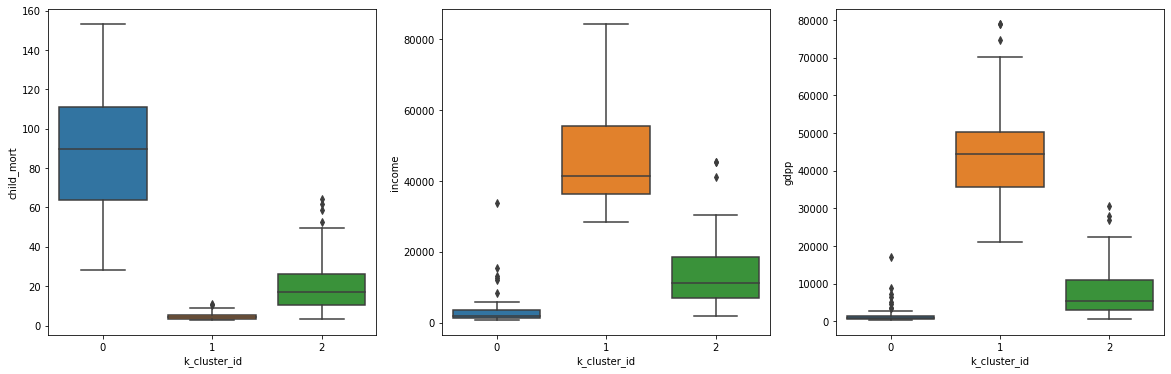

In [48]:
# Box plot on Original attributes to visualize
fig, axes = plt.subplots(1,3, figsize=(20,6))
sns.boxplot(x = 'k_cluster_id', y = 'child_mort', data = df_ngo, ax=axes[0])
sns.boxplot(x = 'k_cluster_id', y = 'income', data = df_ngo, ax=axes[1])
sns.boxplot(x = 'k_cluster_id', y = 'gdpp', data = df_ngo, ax=axes[2])
plt.show()

## Cluster Profiling (K-Means)

As an analyst our task is to try to find cluster representing Low GDPP, Low Income and High Child_Mort

In [49]:
df_ngo[['gdpp','income','child_mort','k_cluster_id']].groupby('k_cluster_id').mean()

,gdpp,income,child_mort
k_cluster_id,,,
0,1911.400833,3901.010000,90.335417
1,46068.137931,47784.413793,4.989655
2,7808.577778,13804.333333,20.547778


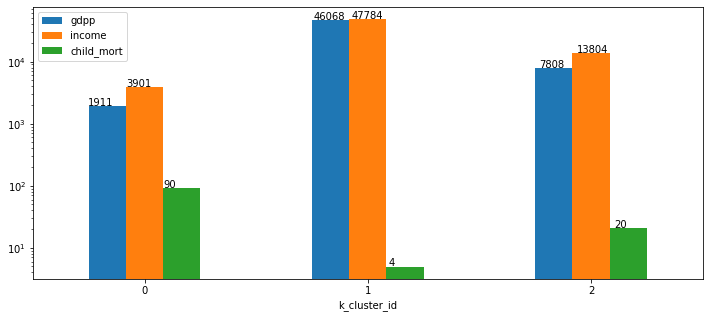

In [50]:
ax=df_ngo[['gdpp','income','child_mort','k_cluster_id']].groupby('k_cluster_id').mean().plot(kind = 'bar', figsize = (12,5))
for p in ax.patches:
     ax.annotate(str(int(p.get_height())), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation=0)
plt.yscale('log')
plt.show()

Once the cluster has been identified, we are required to find the top-5 countries that are actually in the requirement of the AID  
- Cluster 0 -> Under Developed Countries
- Cluster 1 -> Developed Countries
- Cluster 2 -> Developing Countries  
  
As per business requirement we need to identify cluster with low gdp, low income and high child mortality rate i.e. Cluster 0 "Under Developed Countries"

In [51]:
# Below are Developed countries as per UN & IMF
df_ngo[df_ngo['k_cluster_id']==1].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_cluster_id
82,Kuwait,10.8,25679.5,1012.5500,11704.0,75200.0,11.20,78.2,2.21,38500.0,1
23,Brunei,10.5,23792.2,1002.5200,9884.0,80600.0,16.70,77.1,1.84,35300.0,1
123,Qatar,9.0,43796.9,1272.4300,16731.4,84374.0,6.98,79.5,2.07,70300.0,1
157,United Arab Emirates,8.6,27195.0,1281.0000,22260.0,57600.0,12.50,76.5,1.87,35000.0,1
159,United States,7.3,6001.6,8410.3304,7647.2,49400.0,1.22,78.7,1.93,48400.0,1


In [52]:
# Below are Under Developed countries as per UN & IMF
kmeanfinalout = df_ngo[df_ngo['k_cluster_id']==0].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
kmeanfinalout.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_cluster_id
132,Sierra Leone,153.4,67.032,52.2690,137.655,1220.0,17.20,55.00,5.2000,399.0,0
66,Haiti,153.4,101.286,45.7442,428.314,1500.0,5.45,47.16,3.3300,662.0,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.50,6.5636,897.0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.50,5.2100,446.0,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.50,6.5500,708.0,0


In [53]:
# Below are Developing countries as per UN & IMF
df_ngo[df_ngo['k_cluster_id']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_cluster_id
107,Myanmar,64.4,22.243716,19.4636,104.90964,3720.0,7.04,66.8,2.41,988.0,2
154,Turkmenistan,62.0,3387.720000,111.0000,1975.80000,9940.0,2.31,67.9,2.83,4440.0,2
69,India,58.8,305.100000,54.6750,365.85000,4410.0,8.98,66.2,2.60,1350.0,2
146,Tajikistan,52.4,109.962000,44.1324,432.46800,2110.0,12.50,69.6,3.51,738.0,2
12,Bangladesh,49.4,121.280000,26.6816,165.24400,2440.0,7.14,70.4,2.33,758.0,2


#### K-Means Outcome of final list of top 5 countries which are in direst need of aid based on socio economic factors 

In [54]:
kmeanfinalout['country'].reset_index(drop=True).head()

0    Sierra Leone            
1    Haiti                   
2    Chad                    
3    Central African Republic
4    Mali                    
Name: country, dtype: object

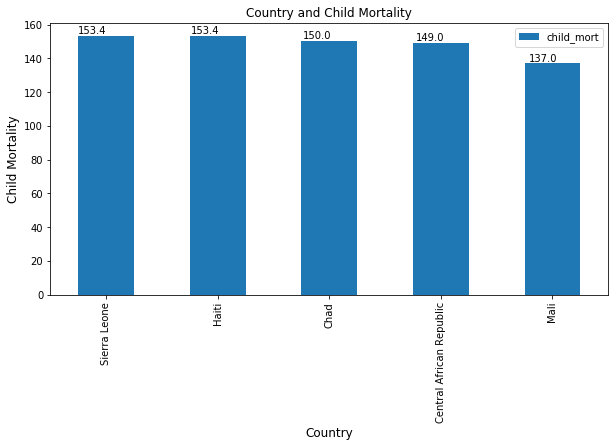

In [55]:
# Plot to visualize child mortality rate of cluster 0
df_list_cm = pd.DataFrame(kmeanfinalout.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
ax=df_list_cm.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Child Mortality')
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Child Mortality', fontsize = 12)
plt.show()

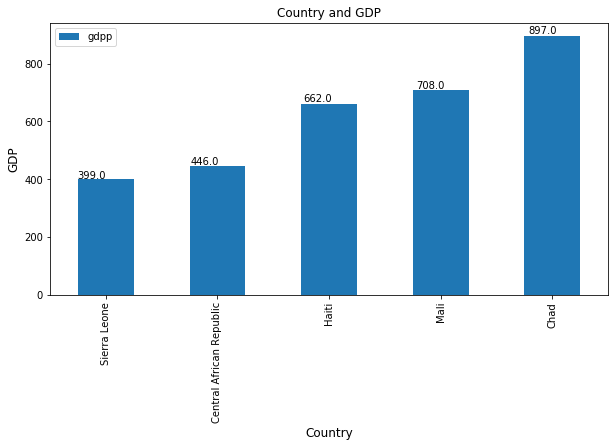

In [56]:
# Plot to visualize gdpp of cluster 0
df_list_gdp = pd.DataFrame(kmeanfinalout.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
ax=df_list_gdp.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and GDP')
plt.xlabel('Country', fontsize = 12)
plt.ylabel('GDP', fontsize = 12)
plt.show()

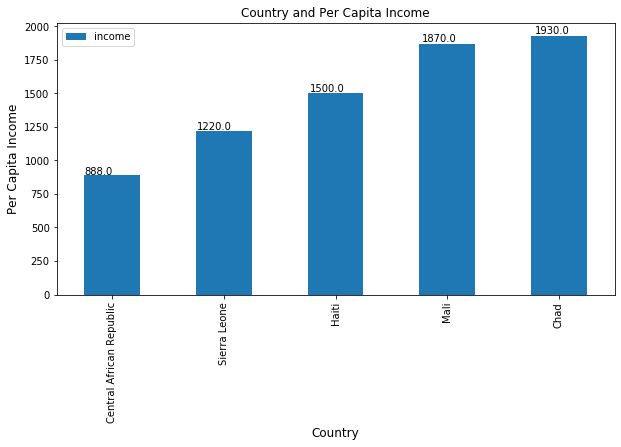

In [57]:
# Plot to visualize per capita income of cluster 0
df_list_inc = pd.DataFrame(kmeanfinalout.groupby(['country'])['income'].mean().sort_values(ascending = True))
ax=df_list_inc.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Per Capita Income')
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Per Capita Income', fontsize = 12)
plt.show()

### Hierarchical Clustering

There are two types of hierarchical clustering - Divisive and Agglomerative

In [58]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


#### Single Linkage:  
In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster

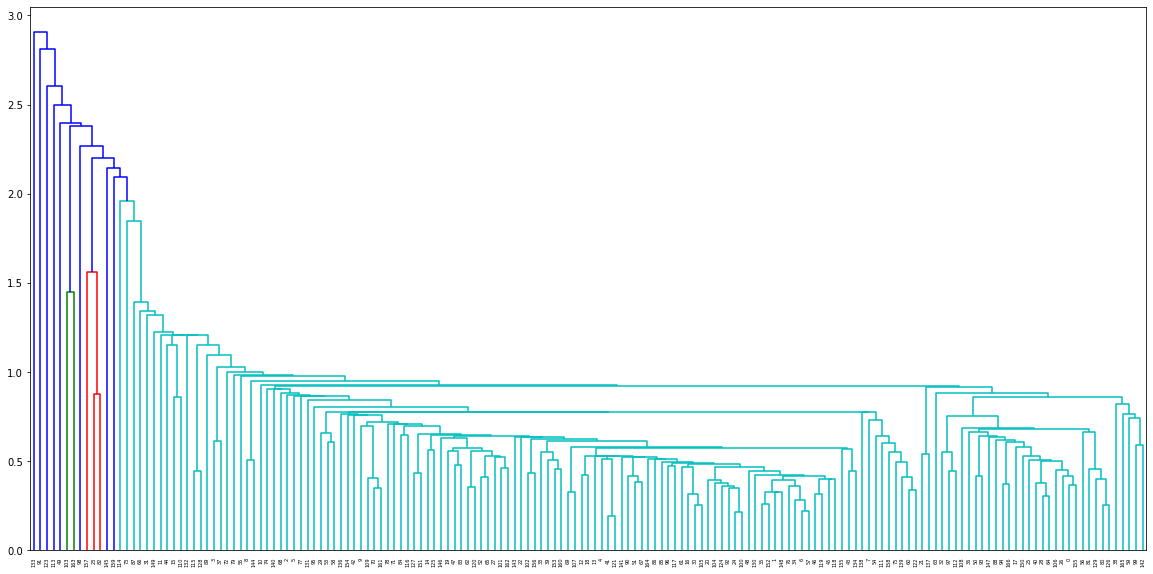

In [59]:
# Single linkage
plt.figure(figsize = (20,10))
mergings = linkage(df_scaled, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

#### Complete Linkage:
In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster

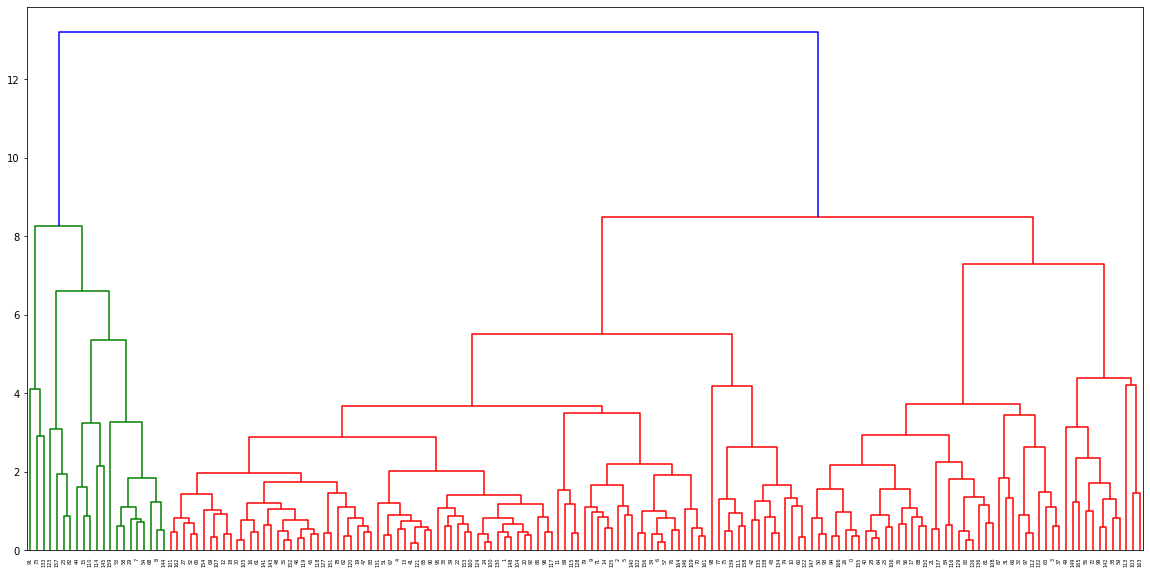

In [60]:
# Complete linkage
plt.figure(figsize = (20,10))
mergings = linkage(df_scaled, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [61]:
# Let's take 3 clusters as - developed, developing and under developed
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0])

In [62]:
# assign the label to original df
df_ngo['h_cluster_id'] = cluster_labels
df_ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_cluster_id,h_cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,1


In [63]:
## Number of countries in each cluster
df_ngo.h_cluster_id.value_counts(ascending=True)

2    21
0    50
1    96
Name: h_cluster_id, dtype: int64

It seems there are good number of countries in each clusters  

From the business understanding we have learnt that Child_Mortality, Income, Gdpp are some important factors which decides the development of any country. Hence, we will proceed with analyzing these 3 components to build some meaningful clusters.

#### Visualize the soread of data across the clusters

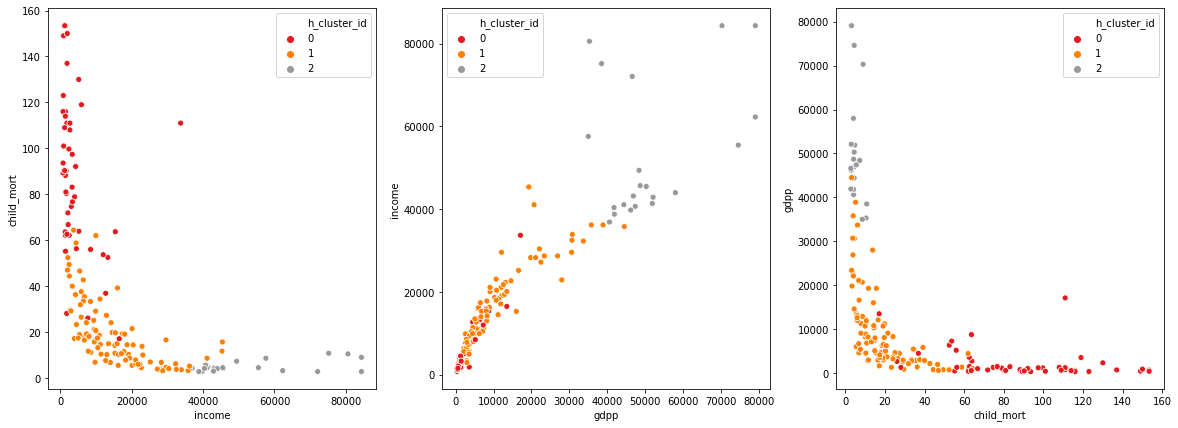

In [64]:
# Scatter plot on Original attributes to visualize
plt.figure(figsize = (20,7))
plt.subplot(1,3,1)
sns.scatterplot(x = 'income', y = 'child_mort', hue='h_cluster_id',data = df_ngo, legend='full', palette="Set1")
plt.subplot(1,3,2)
sns.scatterplot(x = 'gdpp', y = 'income', hue='h_cluster_id', data = df_ngo, legend='full', palette="Set1")
plt.subplot(1,3,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue='h_cluster_id', data= df_ngo, legend='full', palette="Set1")
plt.show()

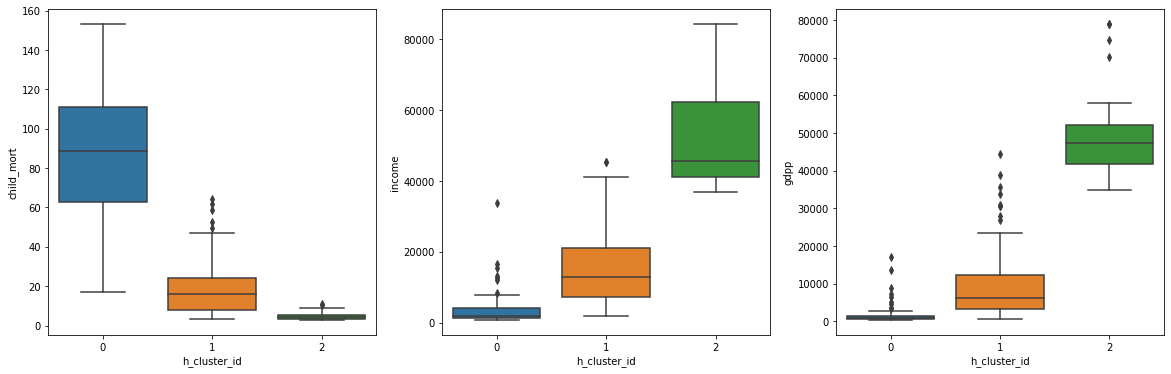

In [65]:
# Box plot on Original attributes to visualize
fig, axes = plt.subplots(1,3, figsize=(20,6))
sns.boxplot(x = 'h_cluster_id', y = 'child_mort', data = df_ngo, ax=axes[0])
sns.boxplot(x = 'h_cluster_id', y = 'income', data = df_ngo, ax=axes[1])
sns.boxplot(x = 'h_cluster_id', y = 'gdpp', data = df_ngo, ax=axes[2])
plt.show()

## Cluster Profiling (Hierarchical Clustering)

As an analyst our task is to try to find cluster representing Low GDPP, Low Income and High Child_Mort

In [66]:
df_ngo[['gdpp','income','child_mort','h_cluster_id']].groupby('h_cluster_id').mean()

,gdpp,income,child_mort
h_cluster_id,,,
0,2157.944800,4229.169600,87.586000
1,9849.187500,15438.333333,19.188542
2,51289.333333,53421.333333,5.176190


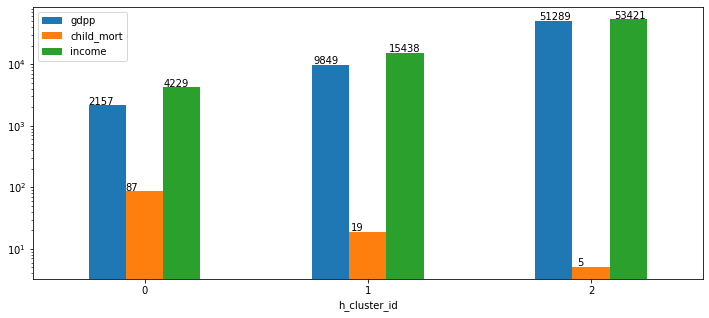

In [67]:
ax=df_ngo[['gdpp','child_mort','income','h_cluster_id']].groupby('h_cluster_id').mean().plot(kind = 'bar',figsize = (12,5))
for p in ax.patches:
     ax.annotate(str(int(p.get_height())), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.yscale('log')
plt.xticks(rotation=0)
plt.show();

Once the cluster has been identified, we are required to find the top-5 countries that are actually in the requirement of the AID  
- Cluster 0 -> Under Developed Countries
- Cluster 1 -> Developing Countries
- Cluster 2 -> Developed Countries 

As per business requirement we need to identify cluster with low gdp, low income and high child mortality rate i.e. Cluster 0 "Under Developed Countries"

In [68]:
# Below are Developed countries as per UN & IMF
df_ngo[df_ngo['h_cluster_id']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_cluster_id,h_cluster_id
82,Kuwait,10.8,25679.5,1012.5500,11704.0,75200.0,11.20,78.2,2.21,38500.0,1,2
23,Brunei,10.5,23792.2,1002.5200,9884.0,80600.0,16.70,77.1,1.84,35300.0,1,2
123,Qatar,9.0,43796.9,1272.4300,16731.4,84374.0,6.98,79.5,2.07,70300.0,1,2
157,United Arab Emirates,8.6,27195.0,1281.0000,22260.0,57600.0,12.50,76.5,1.87,35000.0,1,2
159,United States,7.3,6001.6,8410.3304,7647.2,49400.0,1.22,78.7,1.93,48400.0,1,2


In [69]:
# Below are Developing countries as per UN & IMF
df_ngo[df_ngo['h_cluster_id']==1].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_cluster_id,h_cluster_id
107,Myanmar,64.4,22.243716,19.4636,104.90964,3720.0,7.04,66.8,2.41,988.0,2,1
154,Turkmenistan,62.0,3387.720000,111.0000,1975.80000,9940.0,2.31,67.9,2.83,4440.0,2,1
69,India,58.8,305.100000,54.6750,365.85000,4410.0,8.98,66.2,2.60,1350.0,2,1
146,Tajikistan,52.4,109.962000,44.1324,432.46800,2110.0,12.50,69.6,3.51,738.0,2,1
12,Bangladesh,49.4,121.280000,26.6816,165.24400,2440.0,7.14,70.4,2.33,758.0,2,1


In [70]:
# Below are under developed countries as per UN & IMF
hclusterfinalout =df_ngo[df_ngo['h_cluster_id']==0].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
hclusterfinalout.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_cluster_id,h_cluster_id
132,Sierra Leone,153.4,67.032,52.2690,137.655,1220.0,17.20,55.00,5.2000,399.0,0,0
66,Haiti,153.4,101.286,45.7442,428.314,1500.0,5.45,47.16,3.3300,662.0,0,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.50,6.5636,897.0,0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.50,5.2100,446.0,0,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.50,6.5500,708.0,0,0


#### Hierarchical Clustering Outcome of final list of top 5 countries which are in direst need of aid based on socio economic factors

In [71]:
hclusterfinalout['country'].reset_index(drop=True).head()

0    Sierra Leone            
1    Haiti                   
2    Chad                    
3    Central African Republic
4    Mali                    
Name: country, dtype: object

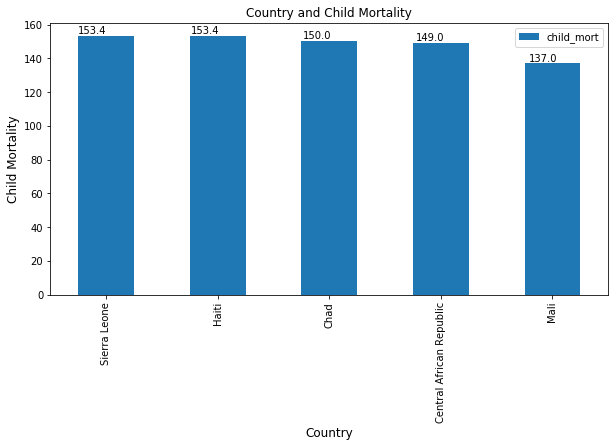

In [72]:
# Plot to visualize child mortality rate of cluster 0
df_list_hcm = pd.DataFrame(hclusterfinalout.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
ax=df_list_hcm.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Child Mortality')
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Child Mortality', fontsize = 12)
plt.show()

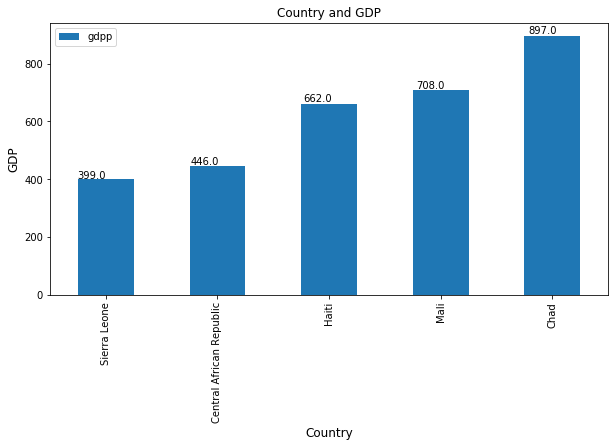

In [73]:
# Plot to visualize gdpp of cluster 0
df_list_hgdp = pd.DataFrame(hclusterfinalout.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
ax=df_list_hgdp.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and GDP')
plt.xlabel('Country', fontsize = 12)
plt.ylabel('GDP', fontsize = 12)
plt.show()

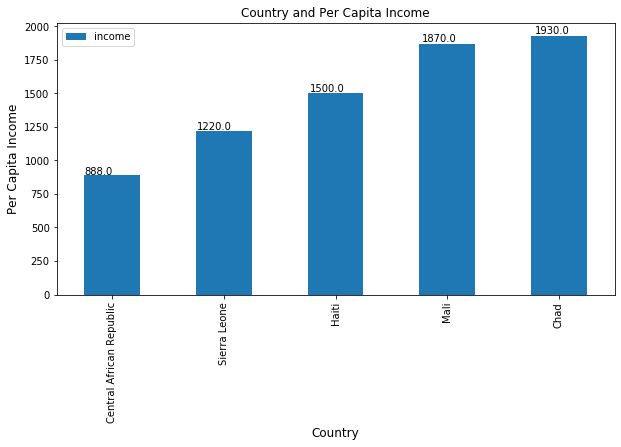

In [74]:
# Plot to visualize gdpp of cluster 0
df_list_hinc = pd.DataFrame(hclusterfinalout.groupby(['country'])['income'].mean().sort_values(ascending = True))
ax=df_list_hinc.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Per Capita Income')
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Per Capita Income', fontsize = 12)
plt.show()

- We have analyzed both K-means and Hierarchical clustering and found clusters formed are identical
- K Means clustering requires prior knowledge of K i.e. no. of initial clusters. Where as, in hierarchical we can cut the dendrogram at appropriate level to get a better initial cluster
- The time complexity of K Means is linear = O(n) while that of hierarchical clustering is quadratic = O(n2). We did not experience tangible difference in execution time as dataset was very small
- Considering the time complexity and dataset given we will proceed with the clusters formed by K-means and based on the information provided by the final clusters we will deduce the final list of countries which are in need of aid

## Final Analysis/Outcome

Final List of countries which are in need of the aid based on socio-economic factors

In [75]:
kmeanfinalout['country'].reset_index(drop=True).head()

0    Sierra Leone            
1    Haiti                   
2    Chad                    
3    Central African Republic
4    Mali                    
Name: country, dtype: object

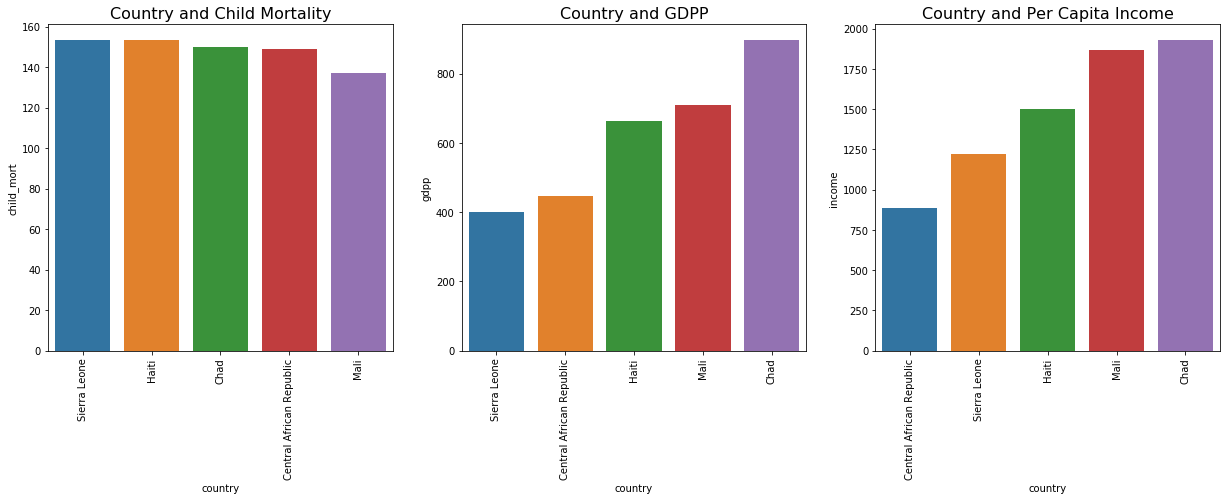

In [76]:
# Plot for GDP, Child Mortality and Income of top 5 countries in dire need of aid
plt.figure(figsize=(21,6))
plt.subplot(1,3,1)
sns.barplot(x=df_list_cm.index, y='child_mort', data=df_list_cm)
plt.title('Country and Child Mortality',fontsize=16)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.barplot(x=df_list_gdp.index, y='gdpp', data=df_list_gdp)
plt.title('Country and GDPP',fontsize=16)
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.barplot(x=df_list_inc.index, y='income', data=df_list_inc)
plt.title('Country and Per Capita Income',fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [77]:
kmeanfinalout[['gdpp','income','child_mort']].describe()

,gdpp,income,child_mort
count,5.000000,5.000000,5.00000
mean,622.400000,1481.600000,148.56000
std,203.301008,439.616651,6.75929
min,399.000000,888.000000,137.00000
25%,446.000000,1220.000000,149.00000
50%,662.000000,1500.000000,150.00000
75%,708.000000,1870.000000,153.40000
max,897.000000,1930.000000,153.40000


## Conclusion  -  
- We used K-Means Clustering and clustered the countries in dataset into 3 categories ; those are - Under developed, Deevloping and Developed based on factors such as child mortality rate, gdp, per capita income and inflation.  
- Post that we analysed the cluster distribution and took the cluster representing under developed countries to identify the list of countries that are in dire need of aid based on above mentioned socio economic factors. 
- Lastly, we visualized the three variables - gdpp, child_mort and income for the identified top 5 list of countries 

**Note** -  
*The list of countries are subject to change based on the below factors such as:-*
- *Type of Outlier Treatment,*
- *Number of Components selected,* 
- *Number of Clusters selected,* 
- *Clustering method used to build the model*
